# Airport Traffic Delays
September 2016 <br>
Author: Peter Corniotes

##### Import Modules

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from math import sin, cos, sqrt, atan2, radians
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)
%matplotlib inline

##### Load Datasets and Organize Data

In [2]:
df1 = pd.read_csv('/Users/petercorniotes/Downloads/airports.csv')
df2 = pd.read_csv('/Users/petercorniotes/Downloads/airport_operations.csv')
df3 = pd.read_csv('/Users/petercorniotes/Downloads/airport_cancellations.csv')
df1.head(2)

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No


In [3]:
# delete certain columns in first dataframe
del df1['Key']; del df1['AP_NAME']; del df1['Facility Type']; del df1['FAA REGION'] 
del df1['COUNTY']; del df1['AP Type']; del df1['Boundary Data Available']

# rename columns in first dataframe
df1.columns = ['Airport', 'Name', 'City', 'State', 'Latitude', 'Longitude'] 

print 'df1 shape', df1.shape
df1.head(2)

df1 shape (5167, 6)


,Airport,Name,City,State,Latitude,Longitude
0,STX,Henry E Rohlsen Int'l Airport,CHRISTIANSTED,VI,17.701556,-64.801722
1,X64,NaN,PATILLAS,PR,17.982189,-66.019330


In [4]:
#combine latitude and longitude into a tuple
coordinates = []
lats = df1['Latitude'].tolist()
longs = df1['Longitude'].tolist()
for i in range(len(lats)):
    tupleEx = (lats[i], longs[i])
    coordinates.append(tupleEx)
df1['Coordinates'] = coordinates
df1.head()

,Airport,Name,City,State,Latitude,Longitude,Coordinates
0,STX,Henry E Rohlsen Int'l Airport,CHRISTIANSTED,VI,17.701556,-64.801722,"(17.701556, -64.801722)"
1,X64,NaN,PATILLAS,PR,17.982189,-66.019330,"(17.982189, -66.01933)"
2,PSE,Aeropuerto Mercedita,PONCE,PR,18.008306,-66.563028,"(18.008306, -66.563028)"
3,VQS,Aeropuerto Antonio Rivera Rodr�guez,ISLA DE VIEQUES,PR,18.134811,-65.493617,"(18.134811, -65.493617)"
4,X63,Aeropuerto Regional De Humacao,HUMACAO,PR,18.138017,-65.800718,"(18.138017, -65.800718)"


In [5]:
#check coordinates, then delete latitude and longitude columns
del df1['Latitude']; del df1['Longitude']  

In [6]:
print 'df2 shape', df2.shape
df2.head(2)

df2 shape (841, 15)


,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.814,0.7922,0.8001,9.60,9.79,2.29,11.2,2.26,0.89,2.34,10.24


In [7]:
#rename columns in 2nd dataframe
df2.columns = ['Airport', 'Year', 'Num_Departures', 'Num_Arrivals', 
               'Gate_Departures_%_on_Time', 'Airport_Departures_%_on_Time', 
               'Gate_Arrivals_%_on_Time', 'uAvg_Delay_Gate_Departures', 'Avg_Taxi_Out_Time', 
               'uAvg_Taxi_Out_Delay', 'Avg_Departure_Delay', 'Avg_Airborne_Delay', 
               'Avg_Taxi_in_Delay', 'Avg_Block_Delay', 'Avg_Gate_Arrival_Delay']

#keep only most recent year of data
df2 = df2.loc[df2['Year'] == 2014]  

df2.head(2)

,Airport,Year,Num_Departures,Num_Arrivals,Gate_Departures_%_on_Time,Airport_Departures_%_on_Time,Gate_Arrivals_%_on_Time,uAvg_Delay_Gate_Departures,Avg_Taxi_Out_Time,uAvg_Taxi_Out_Delay,Avg_Departure_Delay,Avg_Airborne_Delay,Avg_Taxi_in_Delay,Avg_Block_Delay,Avg_Gate_Arrival_Delay
10,ABQ,2014,33292,33137,0.7451,0.7148,0.732,14.30,10.64,2.41,15.99,1.73,1.02,2.40,14.72
21,ANC,2014,71099,66704,0.8288,0.8074,0.860,11.33,11.33,1.33,12.34,4.09,0.54,4.57,10.82


In [8]:
print 'df3 shape', df3.shape
df3.head(2)

df3 shape (805, 6)


,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0


In [9]:
#rename columns in 3rd dataframe
df3.columns = ['Airport', 'Year', 'Departure_Cancellations', 'Arrival_Cancellations', 
               'Departure_Diversions', 'Arrival_Diversions'] 

#keep only latest year of data
df3 = df3.loc[df3['Year'] == 2014] 

#reformat all numerical values as integers
df3[list(df3.columns)[1:]] = df3[list(df3.columns)[1:]].fillna(0.0).astype(int)

df3.head(2)

,Airport,Year,Departure_Cancellations,Arrival_Cancellations,Departure_Diversions,Arrival_Diversions
10,ABQ,2014,315,274,66,37
21,ANC,2014,111,162,74,28


In [10]:
#merge 2nd and 3rd dataframes
df4 = pd.merge(df2, df3, on='Airport')
del df4['Year_x']
del df4['Year_y']
print 'df4 shape', df4.shape
df4.head(3)

df4 shape (72, 18)


,Airport,Num_Departures,Num_Arrivals,Gate_Departures_%_on_Time,Airport_Departures_%_on_Time,Gate_Arrivals_%_on_Time,uAvg_Delay_Gate_Departures,Avg_Taxi_Out_Time,uAvg_Taxi_Out_Delay,Avg_Departure_Delay,Avg_Airborne_Delay,Avg_Taxi_in_Delay,Avg_Block_Delay,Avg_Gate_Arrival_Delay,Departure_Cancellations,Arrival_Cancellations,Departure_Diversions,Arrival_Diversions
0,ABQ,33292,33137,0.7451,0.7148,0.7320,14.30,10.64,2.41,15.99,1.73,1.02,2.40,14.72,315,274,66,37
1,ANC,71099,66704,0.8288,0.8074,0.8600,11.33,11.33,1.33,12.34,4.09,0.54,4.57,10.82,111,162,74,28
2,ATL,428954,428312,0.7899,0.7134,0.8123,11.99,17.40,4.92,15.93,2.74,2.77,3.21,12.42,5977,6483,781,655


In [11]:
#merge all 3 dataframes
df5 = pd.merge(df1, df4, on='Airport')
print 'df5 shape', df5.shape
df5.head()

df5 shape (72, 22)


,Airport,Name,City,State,Coordinates,Num_Departures,Num_Arrivals,Gate_Departures_%_on_Time,Airport_Departures_%_on_Time,Gate_Arrivals_%_on_Time,uAvg_Delay_Gate_Departures,Avg_Taxi_Out_Time,uAvg_Taxi_Out_Delay,Avg_Departure_Delay,Avg_Airborne_Delay,Avg_Taxi_in_Delay,Avg_Block_Delay,Avg_Gate_Arrival_Delay,Departure_Cancellations,Arrival_Cancellations,Departure_Diversions,Arrival_Diversions
0,SJU,Aeropuerto Int'l Luis Mu�oz Marin,SAN JUAN,PR,"(18.439295, -66.002004)",43671,42965,0.8056,0.7784,0.7815,11.71,12.89,1.88,13.13,1.81,1.00,2.93,12.79,280,241,72,31
1,OGG,Kahului Airport,KAHULUI,HI,"(20.89865, -156.430458)",34163,33547,0.9007,0.8881,0.8784,5.80,8.58,1.39,6.44,1.71,0.87,3.85,7.18,114,85,34,35
2,HNL,Honolulu Int'l Airport,HONOLULU,HI,"(21.318681, -157.922429)",90752,88621,0.8882,0.8600,0.8577,6.45,13.52,2.31,7.84,1.91,1.17,3.50,8.22,179,166,64,78
3,MIA,Miami Int'l Airport,MIAMI,FL,"(25.795361, -80.290111)",168629,164346,0.7783,0.7172,0.7825,14.23,17.11,4.28,17.44,2.80,2.40,3.81,14.61,835,948,283,337
4,FLL,Ft Lauderdale/Hollywood Int'l Arpt,FORT LAUDERDALE,FL,"(26.072596, -80.152741)",106272,105742,0.7290,0.6799,0.7434,16.55,15.94,3.58,19.36,2.43,1.21,3.88,15.53,875,894,206,157


In [12]:
# add a new column for airport shortname
shortname = ['SJU-SJuan', 'OGG-Maui', 'HNL-Honlu', 'MIA-Dade', 'FLL-FtLaud', 'RSW-FtMyers', 
             'PBI-WPalmB', 'TPA-Tampa', 'MCO-Orlando', 'SAT-SanAntno', 'HOU-Hobby', 
             'IAH-HoustonBush', 'MSY-NewOrleans', 'AUS-Austin', 'JAX-Fl', 'TUS-Az', 
             'SAN-SDiego', 'DAL-Love', 'DFW-DFtWrth', 'PHX', 'BHM-Al', 'ATL', 'SNA-SantaAna', 
             'LGB-Ca', 'PSP-PalmSpr', 'LAX', 'ONT-Ca', 'BUR-Burbank', 'ABQ-Albuq', 
             'MEM-Memphis', 'CLT-Charlt', 'RDU-Raleigh', 'LAS-Vegas', 'BNA-Nashvl', 
             'SJC-SanJose', 'SFO', 'OAK', 'SDF-Louisvll', 'SMF-Sac', 'STL', 'DCA', 
             'IAD-WaDulles', 'CVG-Ky', 'BWI-Balt', 'MCI-KSCity', 'IND', 'DEN', 'PHL', 
             'DAY-Ohio', 'PIT', 'JFK', 'EWR', 'LGA', 'SLC-SaltL', 'ISP-LiNy', 'HPN-WchNy', 
             'OMA-Omaha', 'CLE', 'SWF-OrangeNY', 'PVD-Ri', 'MDW-Chi', 'BDL-Htfd', 'ORD-Ohare', 
             'DTW-Det', 'BOS', 'MHT-Nh', 'BUF', 'MKE-Milw', 'MSP-Mn', 'PDX-PortOr', 'SEA', 
             'ANC-Anchorage']
df5.insert(0, 'shortname', shortname) 
df5

,shortname,Airport,Name,City,State,Coordinates,Num_Departures,Num_Arrivals,Gate_Departures_%_on_Time,Airport_Departures_%_on_Time,Gate_Arrivals_%_on_Time,uAvg_Delay_Gate_Departures,Avg_Taxi_Out_Time,uAvg_Taxi_Out_Delay,Avg_Departure_Delay,Avg_Airborne_Delay,Avg_Taxi_in_Delay,Avg_Block_Delay,Avg_Gate_Arrival_Delay,Departure_Cancellations,Arrival_Cancellations,Departure_Diversions,Arrival_Diversions
0,SJU-SJuan,SJU,Aeropuerto Int'l Luis Mu�oz Marin,SAN JUAN,PR,"(18.439295, -66.002004)",43671,42965,0.8056,0.7784,0.7815,11.71,12.89,1.88,13.13,1.81,1.00,2.93,12.79,280,241,72,31
1,OGG-Maui,OGG,Kahului Airport,KAHULUI,HI,"(20.89865, -156.430458)",34163,33547,0.9007,0.8881,0.8784,5.80,8.58,1.39,6.44,1.71,0.87,3.85,7.18,114,85,34,35
2,HNL-Honlu,HNL,Honolulu Int'l Airport,HONOLULU,HI,"(21.318681, -157.922429)",90752,88621,0.8882,0.8600,0.8577,6.45,13.52,2.31,7.84,1.91,1.17,3.50,8.22,179,166,64,78
3,MIA-Dade,MIA,Miami Int'l Airport,MIAMI,FL,"(25.795361, -80.290111)",168629,164346,0.7783,0.7172,0.7825,14.23,17.11,4.28,17.44,2.80,2.40,3.81,14.61,835,948,283,337
4,FLL-FtLaud,FLL,Ft Lauderdale/Hollywood Int'l Arpt,FORT LAUDERDALE,FL,"(26.072596, -80.152741)",106272,105742,0.7290,0.6799,0.7434,16.55,15.94,3.58,19.36,2.43,1.21,3.88,15.53,875,894,206,157
5,RSW-FtMyers,RSW,Southwest Florida Int'l Airport,FORT MYERS,FL,"(26.536167, -81.755167)",34687,34572,0.7816,0.7525,0.7558,13.91,12.31,2.45,15.67,2.61,1.02,3.93,14.58,384,350,92,82
6,PBI-WPalmB,PBI,Palm Beach Int'l Airport,WEST PALM BEACH,FL,"(26.683167, -80.095583)",37466,36904,0.6586,0.6297,0.6439,18.58,13.11,2.21,20.42,2.93,0.78,5.03,20.17,429,414,88,56
7,TPA-Tampa,TPA,Tampa Int'l Airport,TAMPA,FL,"(27.975472, -82.53325)",79489,79173,0.7726,0.7454,0.7536,14.33,12.00,2.39,15.97,2.24,0.88,3.53,14.87,723,691,183,163
8,MCO-Orlando,MCO,Orlando Int'l Airport,ORLANDO,FL,"(28.429394, -81.308993)",139833,139627,0.7548,0.7096,0.7571,15.69,13.81,3.69,18.46,2.13,2.16,3.91,15.16,1249,1251,344,311
9,SAT-SanAntno,SAT,San Antonio Int'l Airport,SAN ANTONIO,TX,"(29.533694, -98.469778)",53144,53325,0.7601,0.7356,0.7323,13.55,11.07,2.07,14.86,2.17,1.02,2.84,15.20,458,389,80,84


##### Create a Matrix of Distances (in Kilometers) between Airports 

In [13]:
# function for measuring distance between 2 locations (source: stackoverflow)
def distance_between(lat_long_1, lat_long_2):
    R = 6373.0
    lat1 = radians(lat_long_1[0])
    lon1 = radians(lat_long_1[1])
    lat2 = radians(lat_long_2[0])
    lon2 = radians(lat_long_2[1])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance   

airp_ix = df5['shortname']
coordinates = df5['Coordinates']
df6 = pd.DataFrame(index=airp_ix, columns=['temporary_col'])
del df6['temporary_col']
num_airports = df5.shape[0]
for i in range(num_airports):
    distances = []
    short_name = airp_ix[i]
    for j in range(num_airports):
        distance = distance_between(coordinates[i], coordinates[j])
        distances.append(distance)
    s = pd.Series(distances, index=airp_ix)
    df6[short_name] = s
print 'df6 shape', df6.shape
df6

df6 shape (72, 72)


,SJU-SJuan,OGG-Maui,HNL-Honlu,MIA-Dade,FLL-FtLaud,RSW-FtMyers,PBI-WPalmB,TPA-Tampa,MCO-Orlando,SAT-SanAntno,HOU-Hobby,IAH-HoustonBush,MSY-NewOrleans,AUS-Austin,JAX-Fl,TUS-Az,SAN-SDiego,DAL-Love,DFW-DFtWrth,PHX,BHM-Al,ATL,SNA-SantaAna,LGB-Ca,PSP-PalmSpr,LAX,ONT-Ca,BUR-Burbank,ABQ-Albuq,MEM-Memphis,CLT-Charlt,RDU-Raleigh,LAS-Vegas,BNA-Nashvl,SJC-SanJose,SFO,OAK,SDF-Louisvll,SMF-Sac,STL,DCA,IAD-WaDulles,CVG-Ky,BWI-Balt,MCI-KSCity,IND,DEN,PHL,DAY-Ohio,PIT,JFK,EWR,LGA,SLC-SaltL,ISP-LiNy,HPN-WchNy,OMA-Omaha,CLE,SWF-OrangeNY,PVD-Ri,MDW-Chi,BDL-Htfd,ORD-Ohare,DTW-Det,BOS,MHT-Nh,BUF,MKE-Milw,MSP-Mn,PDX-PortOr,SEA,ANC-Anchorage
shortname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SJU-SJuan,0.000000,9332.581383,9465.915777,1682.596370,1684.236498,1850.180437,1711.569332,1991.930532,1913.920948,3507.926725,3212.485662,3228.937016,2767.220184,3450.922245,2074.118253,4730.704121,5321.248599,3465.165217,3483.406073,4850.078237,2661.060030,2491.700745,5392.438894,5419.865653,5268.600428,5444.582401,5371.534143,5442.423100,4397.057391,2999.111483,2377.383315,2310.787846,5177.443023,2824.493077,5794.327113,5836.058291,5823.564772,2911.246910,5779.827824,3260.964086,2508.259470,2535.126163,2914.348966,2525.304578,3605.377965,3065.316963,4397.280079,2543.630827,2958.386938,2804.847681,2578.731631,2595.219416,2595.767861,5017.206127,2577.309944,2621.782499,3809.249598,2965.906997,2678.525746,2640.638753,3314.656769,2689.452245,3339.077076,3111.353971,2702.712679,2771.996810,2976.711067,3415.190161,3873.114558,5977.538951,5997.905966,7901.499219
OGG-Maui,9332.581383,0.000000,161.711079,7686.144918,7692.114567,7524.728372,7681.559870,7414.696732,7521.179807,5853.355304,6159.428194,6149.518930,6635.534842,5924.234766,7437.693336,4660.222918,4084.775238,5981.873241,5964.211349,4573.330382,6909.986876,7121.963867,4040.073189,4017.252358,4167.039376,3996.700779,4072.145950,4006.864997,5084.285873,6597.172452,7408.676140,7588.069511,4334.488974,6881.956762,3789.098783,3761.562070,3778.203971,6940.868179,3867.417189,6533.709077,7679.464199,7641.599015,7023.287522,7704.274634,6157.153740,6877.139758,5309.987030,7809.944845,7051.838185,7380.240722,7914.618762,7881.228672,7903.780609,4721.059557,7967.022620,7910.855899,6062.472602,7232.210284,7868.649039,8081.215480,6739.955443,7974.479471,6726.243565,7099.471968,8099.351562,8051.167666,7466.442736,6723.046776,6298.636875,4123.595517,4249.596152,4507.710573
HNL-Honlu,9465.915777,161.711079,0.000000,7814.347016,7819.765966,7652.185166,7808.086263,7539.781385,7644.935774,5979.778022,6284.981927,6274.359164,6759.138697,6049.062062,7557.550896,4780.819843,4202.007628,6100.512568,6082.756601,4689.969522,7024.996525,7236.155836,4153.969828,4130.543105,4281.035884,4109.446884,4184.914583,4118.770055,5197.343525,6709.568544,7518.302688,7695.478047,4441.808271,6991.129052,3887.037936,3858.081807,3874.493573,7044.968456,3960.675344,6637.162117,7779.488314,7741.548834,7125.038018,7803.414260,6259.478510,6977.568256,5409.550426,7906.932719,7151.403040,7477.384768,8009.242422,7975.879374,7998.116496,4814.657020,8061.010090,8004.441940,6159.350436,7327.515422,7961.346441,8172.317596,6835.330536,8065.585336,6821.125217,7193.079424,8188.754341,8139.382211,7557.136339,6815.387670,6385.699865,4189.575252,4309.180974,4475.591696
MIA-Dade,1682.596370,7686.144918,7814.347016,0.000000,33.759765,167.870412,100.639506,329.109900,309.857911,1836.436178,1535.359017,1549.857444,1084.866809,1773.557570,540.297001,3053.703470,3643.622871,1784.449561,1802.657925,3169.175287,1065.532529,959.155604,3712.143765,3739.283835,3587.753539,3763.766494,3690.391384,3761.108198,2715.367309,1384.497259,1049.497763,1130.546395,3495.204398,1299.633728,4112.829761,4154.923968,4142.637145,1468.857797,4101.386389,1722.058514,1483.802308,1486.636608,1529.857563,1526.171797,2015.654188,1646.167028,2749.446703,1634.551727,1611.011751,1634.654562,1757.423450,1750.902549,1768.693417,3358.378882,1795.676832,1803.760244,2243.652607,

##### Show a Dendrogram of Clusters based on Distances

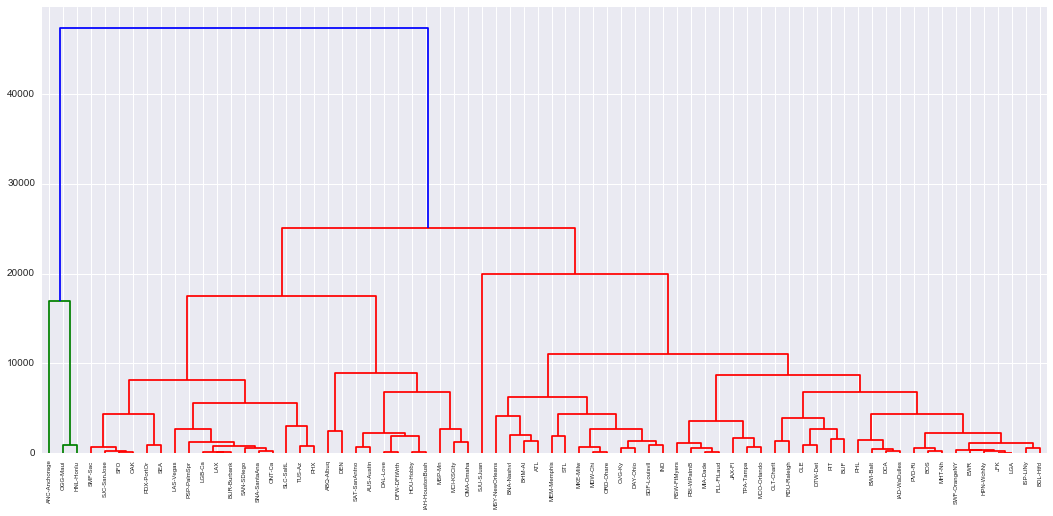

In [14]:
Z = hierarchy.linkage(df6, 'complete')
fig, ax = plt.subplots(figsize=(18,8))
matplotlib.rcParams.update({'font.size': 22})
dn = hierarchy.dendrogram(Z, labels=df6.index)

There were 72 U.S. airports for which the FAA released 2014 traffic data.  The first part of this analysis focuses on the locations of the airports to get a sense of how they should be clustered based on how close or far they are from each other.  For further analysis see my blog at ____.

In [15]:
geo_cluster = ['L','A','A','H','H','H','H','H','H','E','E','E','F','E','H','C','C','E','E','C',
               'F','F','C','C','C','C','C','C','D','G','K','K','C','F','B','B','B','G','B','G',
               'J','J','G','J','E','G','D','J','G','K','I','I','I','C','I','I','E','K','I','I',
               'G','I','G','K','I','I','K','G','E','B','B','A']
len(geo_cluster)

72

##### Scale Numerical Data (other than Coordinates)

In [16]:
#view dataframe
df5.head(1)

,shortname,Airport,Name,City,State,Coordinates,Num_Departures,Num_Arrivals,Gate_Departures_%_on_Time,Airport_Departures_%_on_Time,Gate_Arrivals_%_on_Time,uAvg_Delay_Gate_Departures,Avg_Taxi_Out_Time,uAvg_Taxi_Out_Delay,Avg_Departure_Delay,Avg_Airborne_Delay,Avg_Taxi_in_Delay,Avg_Block_Delay,Avg_Gate_Arrival_Delay,Departure_Cancellations,Arrival_Cancellations,Departure_Diversions,Arrival_Diversions
0,SJU-SJuan,SJU,Aeropuerto Int'l Luis Mu�oz Marin,SAN JUAN,PR,"(18.439295, -66.002004)",43671,42965,0.8056,0.7784,0.7815,11.71,12.89,1.88,13.13,1.81,1.0,2.93,12.79,280,241,72,31


In [17]:
#define x
x = df5.ix[:,6:].values

#check that the correct feature columns for scaling were selected
x

array([[  4.36710000e+04,   4.29650000e+04,   8.05600000e-01, ...,
          2.41000000e+02,   7.20000000e+01,   3.10000000e+01],
       [  3.41630000e+04,   3.35470000e+04,   9.00700000e-01, ...,
          8.50000000e+01,   3.40000000e+01,   3.50000000e+01],
       [  9.07520000e+04,   8.86210000e+04,   8.88200000e-01, ...,
          1.66000000e+02,   6.40000000e+01,   7.80000000e+01],
       ..., 
       [  9.48280000e+04,   9.47020000e+04,   8.27500000e-01, ...,
          4.04000000e+02,   1.23000000e+02,   5.40000000e+01],
       [  1.65858000e+05,   1.65955000e+05,   8.48000000e-01, ...,
          5.43000000e+02,   2.72000000e+02,   9.80000000e+01],
       [  7.10990000e+04,   6.67040000e+04,   8.28800000e-01, ...,
          1.62000000e+02,   7.40000000e+01,   2.80000000e+01]])

In [18]:
#standardize features
xScaled = StandardScaler().fit_transform(x)

#make a dataframe from the scaled values
dfScaled = pd.DataFrame(xScaled, columns=list(df5)[6:])
dfScaled.insert(0, 'shortname', shortname) 
dfScaled.head()

,shortname,Num_Departures,Num_Arrivals,Gate_Departures_%_on_Time,Airport_Departures_%_on_Time,Gate_Arrivals_%_on_Time,uAvg_Delay_Gate_Departures,Avg_Taxi_Out_Time,uAvg_Taxi_Out_Delay,Avg_Departure_Delay,Avg_Airborne_Delay,Avg_Taxi_in_Delay,Avg_Block_Delay,Avg_Gate_Arrival_Delay,Departure_Cancellations,Arrival_Cancellations,Departure_Diversions,Arrival_Diversions
0,SJU-SJuan,-0.663957,-0.668031,0.901689,1.021293,0.586781,-0.912277,-0.240146,-0.767365,-0.996121,-0.914400,-0.415784,-0.307563,-0.633508,-0.550744,-0.549447,-0.559113,-0.614070
1,OGG-Maui,-0.765001,-0.768191,2.576414,2.581952,2.614948,-2.882297,-1.619160,-1.051861,-2.742415,-1.039708,-0.545422,0.972951,-2.630437,-0.634416,-0.622525,-0.773482,-0.595526
2,HNL-Honlu,-0.163614,-0.182481,2.356287,2.182184,2.181687,-2.665628,-0.038573,-0.517706,-2.376973,-0.789092,-0.246257,0.485799,-2.260240,-0.601653,-0.584580,-0.604244,-0.396180
3,MIA-Dade,0.664006,0.622851,0.420932,0.150624,0.607712,-0.072269,1.110073,0.626085,0.128920,0.326149,0.980319,0.917277,0.014337,-0.271000,-0.218252,0.631196,0.804530
4,FLL-FtLaud,0.001321,-0.000400,-0.447249,-0.380028,-0.210671,0.701072,0.735723,0.219662,0.630099,-0.137491,-0.206368,1.014707,0.341819,-0.250839,-0.243549,0.196818,-0.029940


##### K-means Clustering

In [19]:
#create clusters based on traffic data supplied by the FAA
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(xScaled)
lbls = kmeans_model.labels_

#insert labels into dataframe
dfScaled.insert(1, 'cluster_pre_PCA', lbls) 
dfScaled

,shortname,cluster_pre_PCA,Num_Departures,Num_Arrivals,Gate_Departures_%_on_Time,Airport_Departures_%_on_Time,Gate_Arrivals_%_on_Time,uAvg_Delay_Gate_Departures,Avg_Taxi_Out_Time,uAvg_Taxi_Out_Delay,Avg_Departure_Delay,Avg_Airborne_Delay,Avg_Taxi_in_Delay,Avg_Block_Delay,Avg_Gate_Arrival_Delay,Departure_Cancellations,Arrival_Cancellations,Departure_Diversions,Arrival_Diversions
0,SJU-SJuan,2,-0.663957,-0.668031,0.901689,1.021293,0.586781,-0.912277,-0.240146,-0.767365,-0.996121,-0.914400,-0.415784,-0.307563,-0.633508,-0.550744,-0.549447,-0.559113,-0.614070
1,OGG-Maui,2,-0.765001,-0.768191,2.576414,2.581952,2.614948,-2.882297,-1.619160,-1.051861,-2.742415,-1.039708,-0.545422,0.972951,-2.630437,-0.634416,-0.622525,-0.773482,-0.595526
2,HNL-Honlu,2,-0.163614,-0.182481,2.356287,2.182184,2.181687,-2.665628,-0.038573,-0.517706,-2.376973,-0.789092,-0.246257,0.485799,-2.260240,-0.601653,-0.584580,-0.604244,-0.396180
3,MIA-Dade,2,0.664006,0.622851,0.420932,0.150624,0.607712,-0.072269,1.110073,0.626085,0.128920,0.326149,0.980319,0.917277,0.014337,-0.271000,-0.218252,0.631196,0.804530
4,FLL-FtLaud,0,0.001321,-0.000400,-0.447249,-0.380028,-0.210671,0.701072,0.735723,0.219662,0.630099,-0.137491,-0.206368,1.014707,0.341819,-0.250839,-0.243549,0.196818,-0.029940
5,RSW-FtMyers,0,-0.759432,-0.757291,0.479045,0.652824,0.048867,-0.178937,-0.425721,-0.436421,-0.333104,0.088064,-0.395839,1.084300,0.003658,-0.498324,-0.498386,-0.446288,-0.377636
6,PBI-WPalmB,0,-0.729899,-0.732490,-1.687004,-1.094204,-2.293258,1.377745,-0.169755,-0.575766,0.906791,0.489049,-0.635171,2.615350,1.993469,-0.475642,-0.468405,-0.468853,-0.498171
7,TPA-Tampa,0,-0.283309,-0.282961,0.320554,0.551815,0.002820,-0.038936,-0.524907,-0.471257,-0.254795,-0.375576,-0.535450,0.527555,0.106887,-0.327453,-0.338644,0.067069,-0.002125
8,MCO-Orlando,0,0.357983,0.359965,0.007093,0.042502,0.076077,0.414402,0.054215,0.283528,0.395171,-0.513414,0.740987,1.056463,0.210115,-0.062326,-0.076312,0.975315,0.683995
9,SAT-SanAntno,0,-0.563285,-0.557853,0.100427,0.412394,-0.443000,-0.298938,-0.822467,-0.657051,-0.544539,-0.463291,-0.395839,-0.432831,0.224353,-0.461025,-0.480116,-0.513983,-0.368364


##### Prepare for PCA by Calculating Cumulative Explained Variance

In [20]:
#create covariance matrix
covar_matrx = np.cov(xScaled.T)

# decompose covariances to get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covar_matrx)

# review eigenvalues
# they should already be in descending order, if not, do eigenvalues.sort(reverse=True) 
print 'eigenvalues\n-----------'
for i in eigenvalues:
    print i

eigenvalues
-----------
8.59840355377
4.62568024275
1.43105219043
0.924639818639
0.553875857499
0.316161643099
0.213731156624
0.203463771864
0.147713033832
0.098862664845
0.0686977215256
0.0378467124863
0.0156994851413
0.00241298393834
3.39060938327e-05
0.000396102167211
0.000765775020365


In [21]:
#calculate the explained variance
total = sum(eigenvalues)
variance_explained = [(i / total)*100 for i in eigenvalues]
cumulative_variance = np.cumsum(variance_explained)

#create an index
ix = []
for i in range(1, len(variance_explained) + 1):
    stringEx = str('component ' + str(i))
    ix.append(stringEx)
    
# review explained variance
dfvar = pd.DataFrame(zip(variance_explained, cumulative_variance), 
                     index=ix, 
                     columns=['Variance Explained', 'Cumulative Variance Explained'])
dfvar

,Variance Explained,Cumulative Variance Explained
component 1,49.876360,49.876360
component 2,26.831969,76.708329
component 3,8.301038,85.009367
component 4,5.363515,90.372883
component 5,3.212842,93.585725
component 6,1.833944,95.419669
component 7,1.239780,96.659449
component 8,1.180223,97.839672
component 9,0.856832,98.696504
component 10,0.573468,99.269972


##### Run Principal Component Analysis & Create New Clusters 

In [22]:
# run principle component analysis - 76.7% of variance captured by first 2 components
mdl = PCA(n_components = 2)
xPC = mdl.fit_transform(xScaled)

#create new dataframe
PCdf = pd.DataFrame(xPC, columns=['PC1','PC2'])

#insert a column for airport code
airpt = df5['Airport']
PCdf.insert(0, 'airport_code', airpt)
                                   
#insert a column for airport name
PCdf.insert(0, 'shortname', shortname) 
                                  
#create clusters based on PC1 and PC2                                   
kmeans_modl = KMeans(n_clusters=3, random_state=1).fit(xPC)
labls = kmeans_modl.labels_
PCdf.insert(2, 'cluster_pst_PCA', labls) 
df5
                                    
PCdf

,shortname,airport_code,cluster_pst_PCA,PC1,PC2
0,SJU-SJuan,SJU,2,-2.565291,-1.143564
1,OGG-Maui,OGG,2,-4.733866,-4.918133
2,HNL-Honlu,HNL,2,-3.332634,-4.729553
3,MIA-Dade,MIA,2,1.496376,-1.151368
4,FLL-FtLaud,FLL,0,0.693206,0.954536
5,RSW-FtMyers,RSW,0,-1.443324,0.077078
6,PBI-WPalmB,PBI,0,0.516962,4.223746
7,TPA-Tampa,TPA,0,-0.977043,-0.033309
8,MCO-Orlando,MCO,0,1.198831,-0.181162
9,SAT-SanAntno,SAT,0,-1.764588,0.434833


In [23]:
#merge PC1 and PC2
df7 = pd.merge(dfScaled, PCdf, on='shortname')

#move new cluster labels to column 2
cols = list(df7)
cols.insert(2, cols.pop(cols.index('cluster_pst_PCA')))
df7 = df7.ix[:, cols]

#move PC2 to column 3
cols = list(df7)
cols.insert(3, cols.pop(cols.index('PC2')))
df7 = df7.ix[:, cols]

#move PC1 before PC2
cols = list(df7)
cols.insert(3, cols.pop(cols.index('PC1')))
df7 = df7.ix[:, cols]

print 'df7 shape', df7.shape
df7

df7 shape (72, 23)


,shortname,cluster_pre_PCA,cluster_pst_PCA,PC1,PC2,Num_Departures,Num_Arrivals,Gate_Departures_%_on_Time,Airport_Departures_%_on_Time,Gate_Arrivals_%_on_Time,uAvg_Delay_Gate_Departures,Avg_Taxi_Out_Time,uAvg_Taxi_Out_Delay,Avg_Departure_Delay,Avg_Airborne_Delay,Avg_Taxi_in_Delay,Avg_Block_Delay,Avg_Gate_Arrival_Delay,Departure_Cancellations,Arrival_Cancellations,Departure_Diversions,Arrival_Diversions,airport_code
0,SJU-SJuan,2,2,-2.565291,-1.143564,-0.663957,-0.668031,0.901689,1.021293,0.586781,-0.912277,-0.240146,-0.767365,-0.996121,-0.914400,-0.415784,-0.307563,-0.633508,-0.550744,-0.549447,-0.559113,-0.614070,SJU
1,OGG-Maui,2,2,-4.733866,-4.918133,-0.765001,-0.768191,2.576414,2.581952,2.614948,-2.882297,-1.619160,-1.051861,-2.742415,-1.039708,-0.545422,0.972951,-2.630437,-0.634416,-0.622525,-0.773482,-0.595526,OGG
2,HNL-Honlu,2,2,-3.332634,-4.729553,-0.163614,-0.182481,2.356287,2.182184,2.181687,-2.665628,-0.038573,-0.517706,-2.376973,-0.789092,-0.246257,0.485799,-2.260240,-0.601653,-0.584580,-0.604244,-0.396180,HNL
3,MIA-Dade,2,2,1.496376,-1.151368,0.664006,0.622851,0.420932,0.150624,0.607712,-0.072269,1.110073,0.626085,0.128920,0.326149,0.980319,0.917277,0.014337,-0.271000,-0.218252,0.631196,0.804530,MIA
4,FLL-FtLaud,0,0,0.693206,0.954536,0.001321,-0.000400,-0.447249,-0.380028,-0.210671,0.701072,0.735723,0.219662,0.630099,-0.137491,-0.206368,1.014707,0.341819,-0.250839,-0.243549,0.196818,-0.029940,FLL
5,RSW-FtMyers,0,0,-1.443324,0.077078,-0.759432,-0.757291,0.479045,0.652824,0.048867,-0.178937,-0.425721,-0.436421,-0.333104,0.088064,-0.395839,1.084300,0.003658,-0.498324,-0.498386,-0.446288,-0.377636,RSW
6,PBI-WPalmB,0,0,0.516962,4.223746,-0.729899,-0.732490,-1.687004,-1.094204,-2.293258,1.377745,-0.169755,-0.575766,0.906791,0.489049,-0.635171,2.615350,1.993469,-0.475642,-0.468405,-0.468853,-0.498171,PBI
7,TPA-Tampa,0,0,-0.977043,-0.033309,-0.283309,-0.282961,0.320554,0.551815,0.002820,-0.038936,-0.524907,-0.471257,-0.254795,-0.375576,-0.535450,0.527555,0.106887,-0.327453,-0.338644,0.067069,-0.002125,TPA
8,MCO-Orlando,0,0,1.198831,-0.181162,0.357983,0.359965,0.007093,0.042502,0.076077,0.414402,0.054215,0.283528,0.395171,-0.513414,0.740987,1.056463,0.210115,-0.062326,-0.076312,0.975315,0.683995,MCO
9,SAT-SanAntno,0,0,-1.764588,0.434833,-0.563285,-0.557853,0.100427,0.412394,-0.443000,-0.298938,-0.822467,-0.657051,-0.544539,-0.463291,-0.395839,-0.432831,0.224353,-0.461025,-0.480116,-0.513983,-0.368364,SAT


##### Correlation Matrix Comparing PC1 & PC2 with the Scaled Features

In [24]:
#do not include airport names and clusters in the correlation matrix
df8 = df7[list(df7.columns)[3:]]
corr_matrx = df8.corr()   

# 'iloc[[0,1]]' is to skip scaled features on the (index axis which becomes the) column axis
# '.T' is to transpose rows into columns
# '[2:]' is to skip PC1 and PC2 on the index axis
corr_matrx.iloc[[0,1]].T[2:]

,PC1,PC2
Num_Departures,0.848189,-0.450385
Num_Arrivals,0.848993,-0.448074
Gate_Departures_%_on_Time,-0.350454,-0.847624
Airport_Departures_%_on_Time,-0.668130,-0.666078
Gate_Arrivals_%_on_Time,-0.194559,-0.895324
uAvg_Delay_Gate_Departures,0.457572,0.850001
Avg_Taxi_Out_Time,0.731274,-0.202398
uAvg_Taxi_Out_Delay,0.793453,-0.111300
Avg_Departure_Delay,0.709942,0.661215
Avg_Airborne_Delay,0.615571,-0.034298


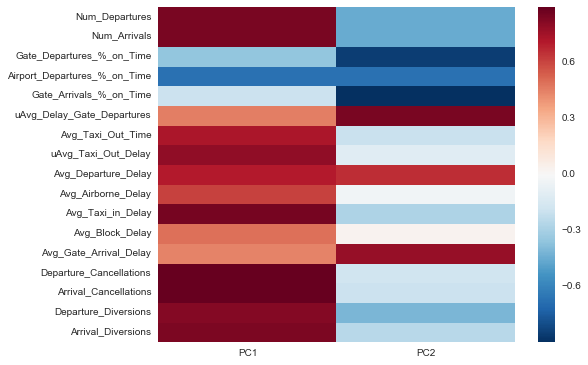

In [25]:
# visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrx.iloc[[0,1]].T[2:])

In [26]:
# show correlation matrix sorted by PC1
corr_matrx = corr_matrx.iloc[[0,1]].T[2:]
corr_matrx.sort_values(by=['PC1'],ascending=0)

,PC1,PC2
Arrival_Cancellations,0.895781,-0.193702
Departure_Cancellations,0.895051,-0.178447
Avg_Taxi_in_Delay,0.860437,-0.278722
Num_Arrivals,0.848993,-0.448074
Num_Departures,0.848189,-0.450385
Arrival_Diversions,0.845072,-0.245465
Departure_Diversions,0.821033,-0.409165
uAvg_Taxi_Out_Delay,0.793453,-0.111300
Avg_Taxi_Out_Time,0.731274,-0.202398
Avg_Departure_Delay,0.709942,0.661215


In [27]:
# show correlation matrix sorted by PC2
corr_matrx.sort_values(by=['PC2'],ascending=0)

,PC1,PC2
uAvg_Delay_Gate_Departures,0.457572,0.850001
Avg_Gate_Arrival_Delay,0.444987,0.777249
Avg_Departure_Delay,0.709942,0.661215
Avg_Block_Delay,0.494882,0.031899
Avg_Airborne_Delay,0.615571,-0.034298
uAvg_Taxi_Out_Delay,0.793453,-0.111300
Departure_Cancellations,0.895051,-0.178447
Arrival_Cancellations,0.895781,-0.193702
Avg_Taxi_Out_Time,0.731274,-0.202398
Arrival_Diversions,0.845072,-0.245465


##### Plotting by Principal Component

The font sizes appearing in the many of the following visuals may be a little small, but that was the only option for having them appear in a single view. 

Each airport's cluster number is plotted by PC1 on the y-axis and PC2 on the x-axis


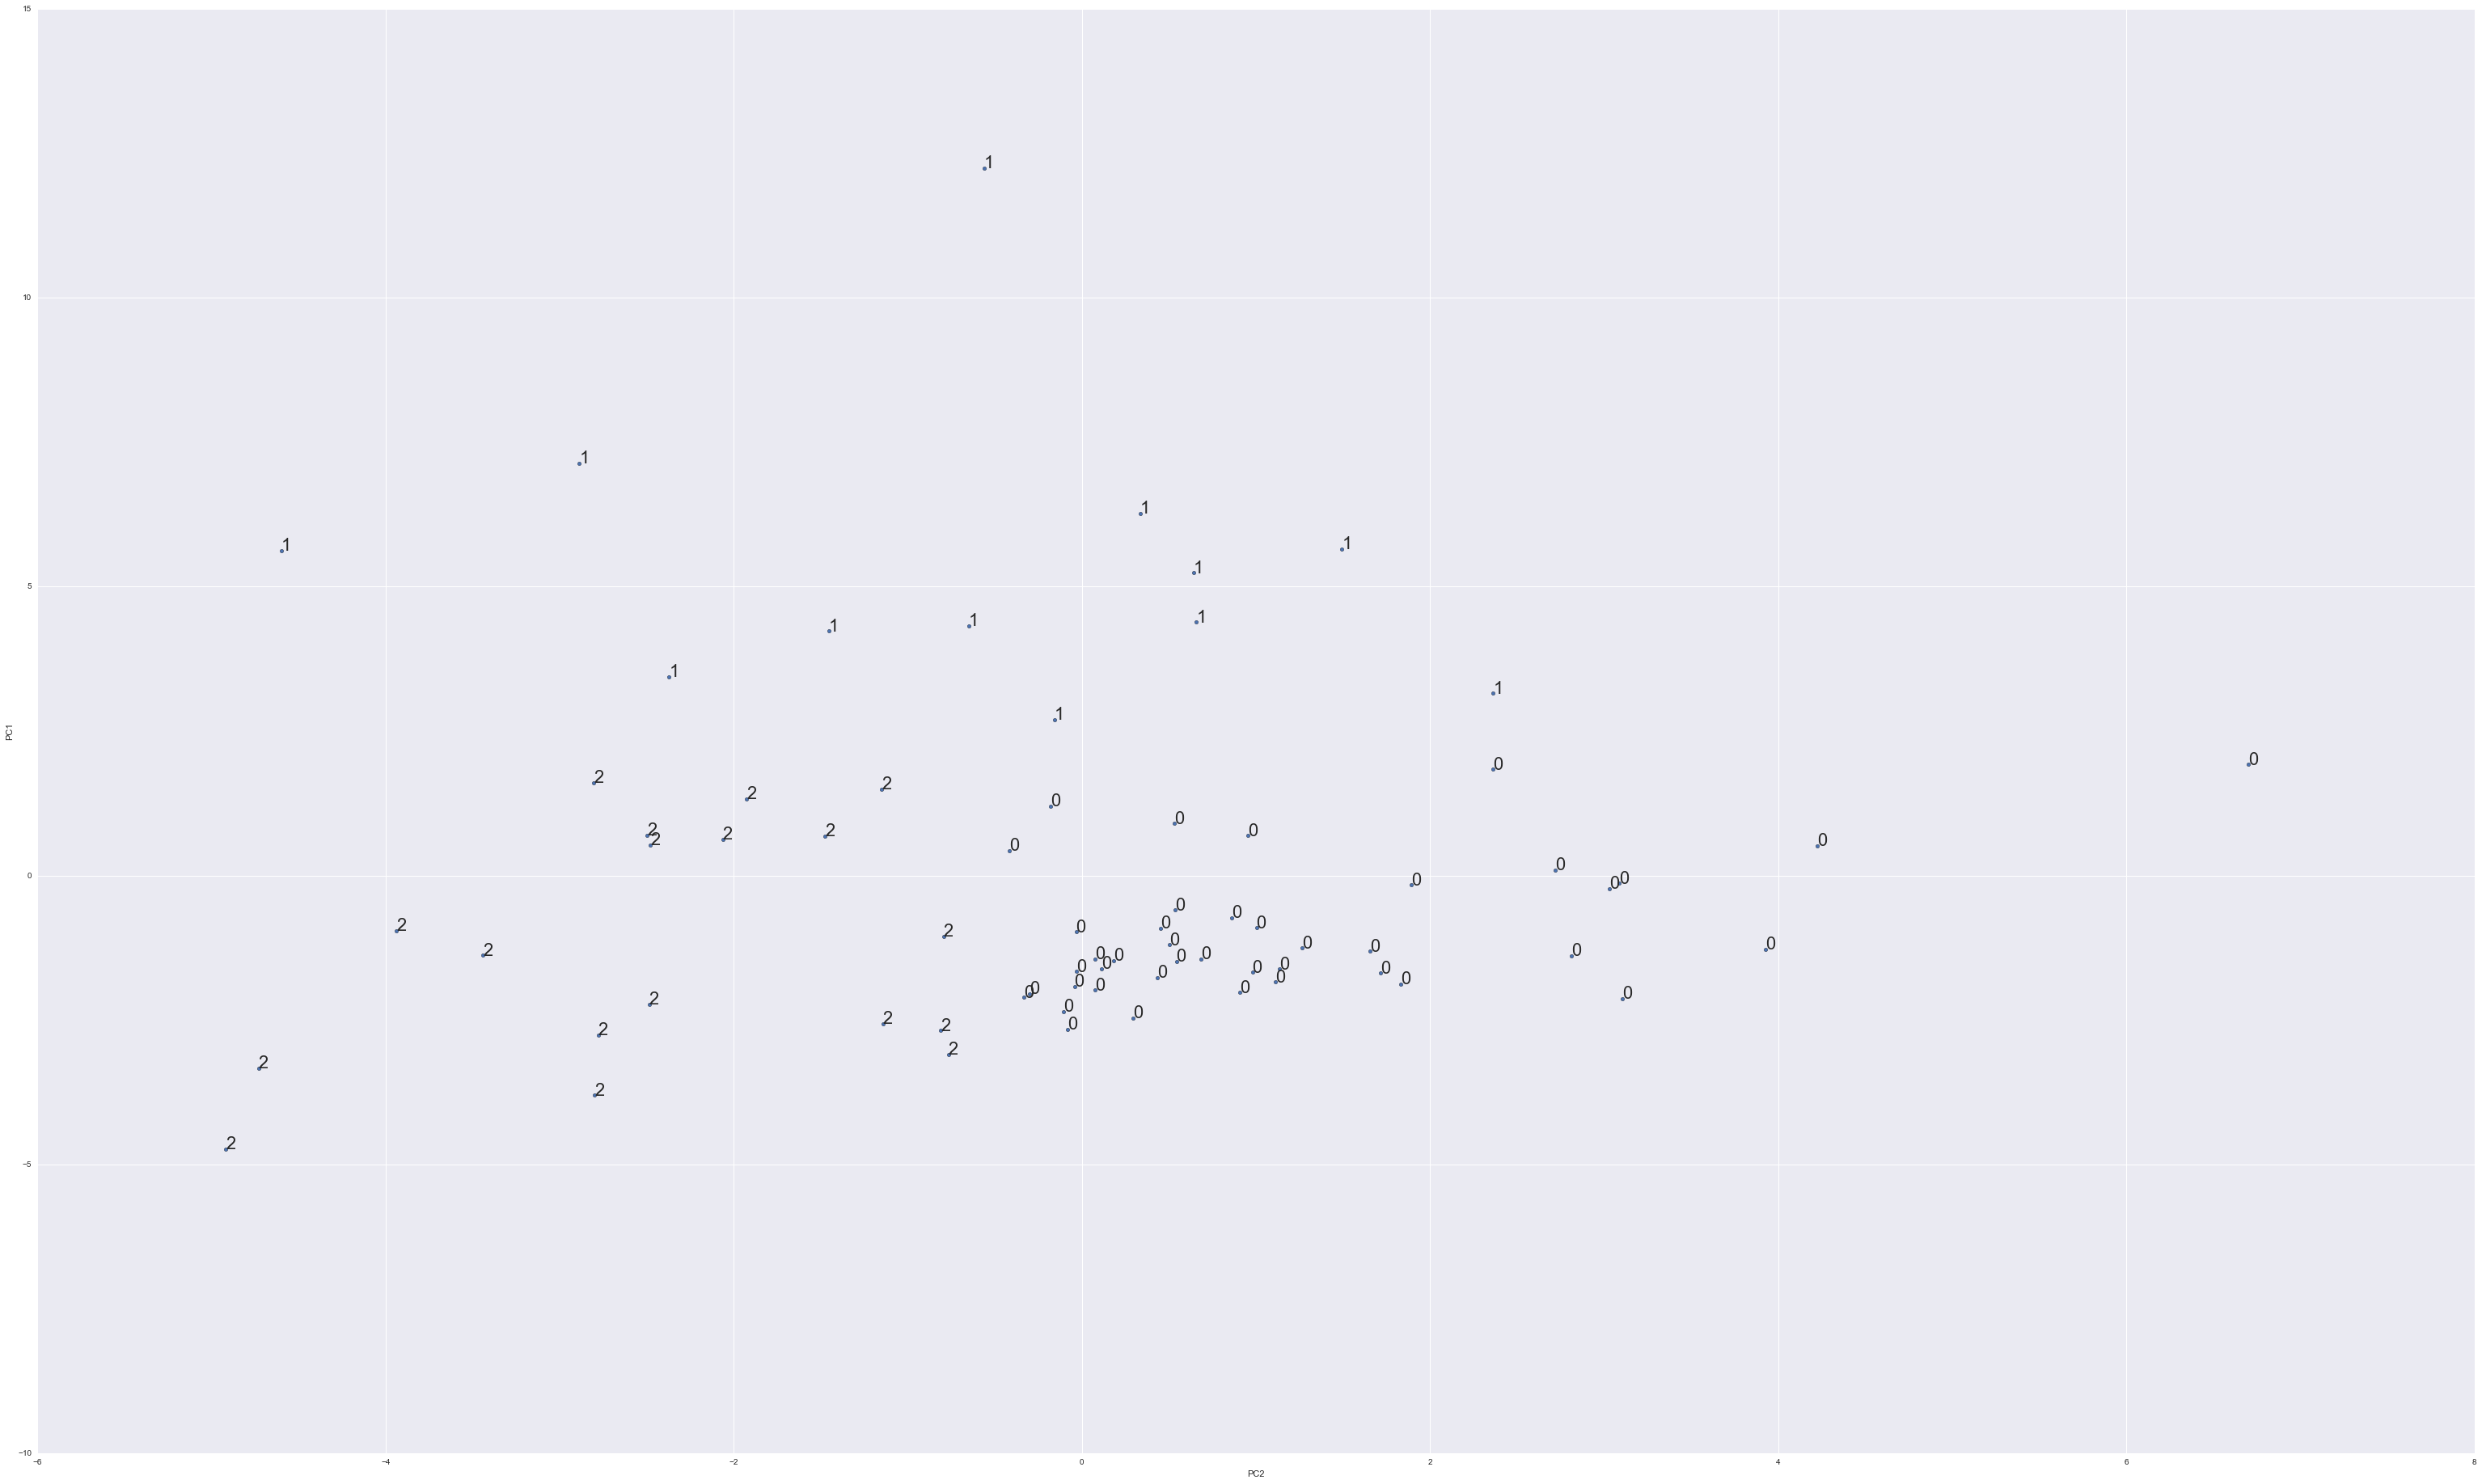

In [28]:
print "Each airport's cluster number is plotted by PC1 on the y-axis and PC2 on the x-axis"

graph = PCdf.plot(kind='scatter', x='PC2', y='PC1', figsize=(54,32))

for i, PCA_cluster in enumerate(PCdf['cluster_pst_PCA']):
    graph.annotate(PCA_cluster, (PCdf.iloc[i].PC2, PCdf.iloc[i].PC1))

Each airport's name is plotted by PC1 on the y-axis and PC2 on the x-axis


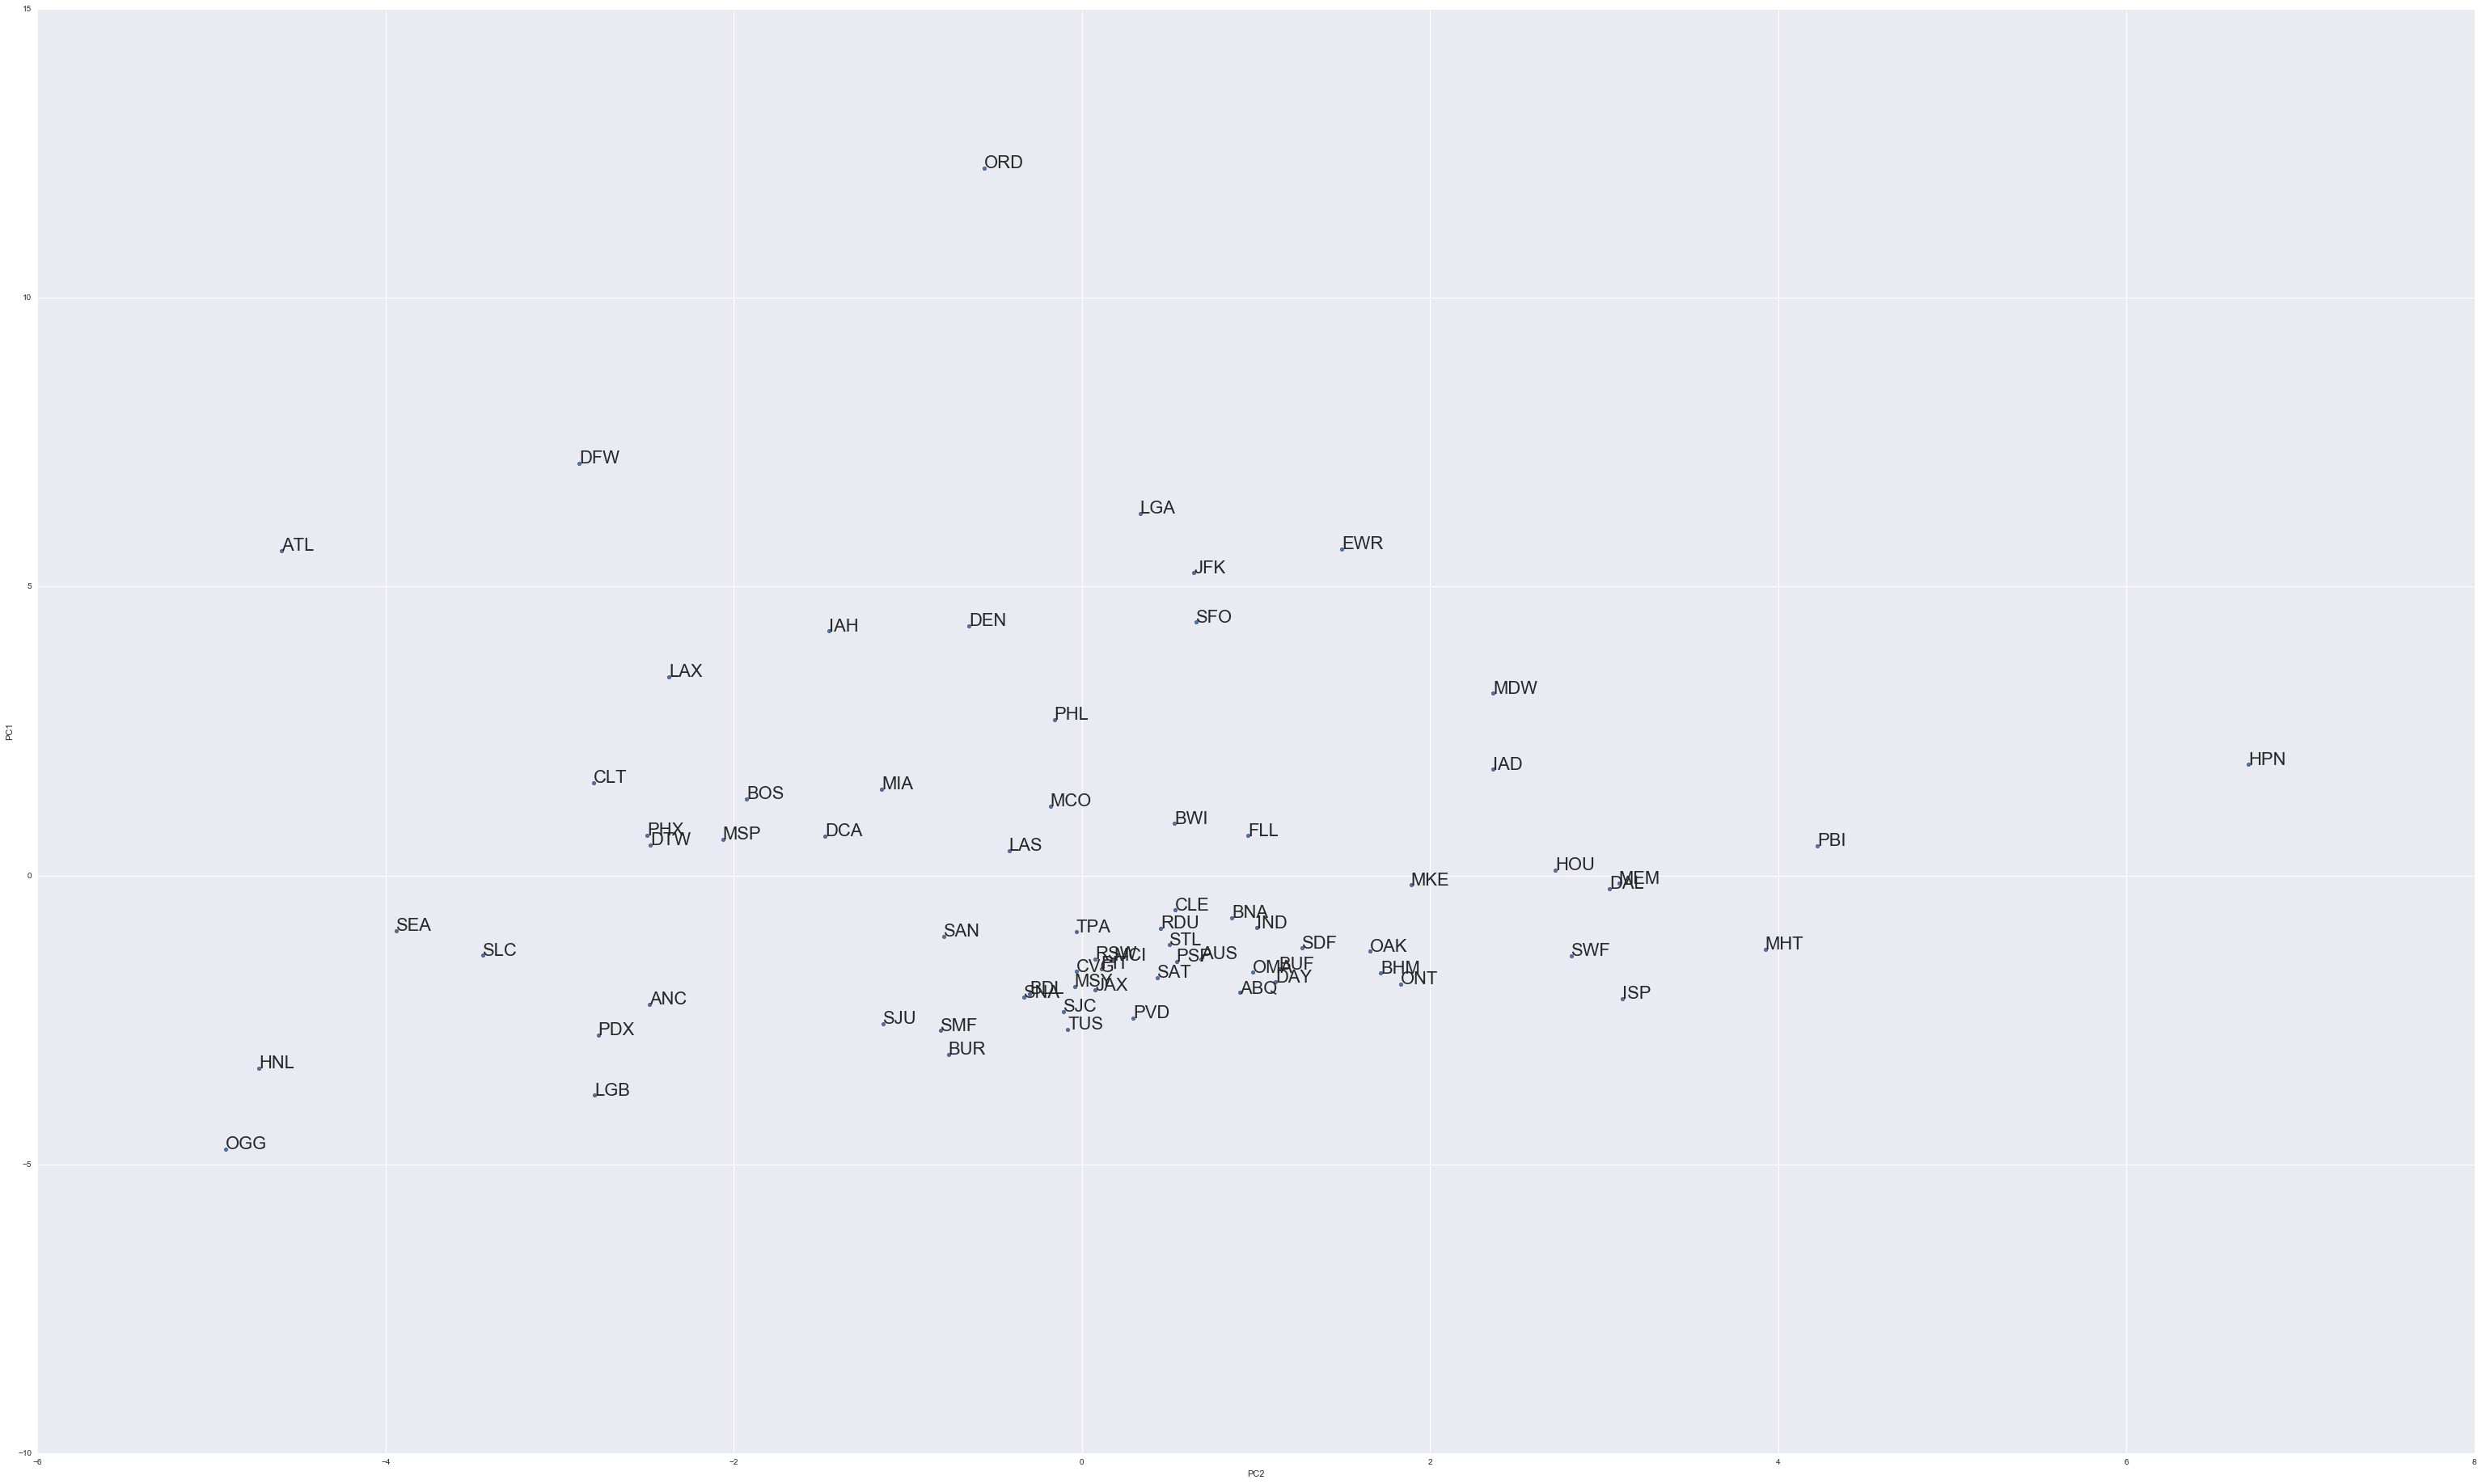

In [29]:
print "Each airport's name is plotted by PC1 on the y-axis and PC2 on the x-axis"

graph = PCdf.plot(kind='scatter', x='PC2', y='PC1', figsize=(54,32))

# for space purposes, use airport code instead of shortname
for i, airport in enumerate(PCdf['airport_code']):
    graph.annotate(airport, (PCdf.iloc[i].PC2, PCdf.iloc[i].PC1))

##### Index Dataframe by Geo_Cluster & Shortname

In [31]:
#move geo_cluster labels to column 2
df7['geo_cluster'] = geo_cluster
#cols = list(df7)
#cols.insert(1, cols.pop(cols.index('geo_cluster')))
#df7 = df7.ix[:, cols]
#df7.head()
pd.pivot_table(df7, index=['geo_cluster', 'shortname'], 
               values=['cluster_pre_PCA', 'cluster_pst_PCA', 'PC1', 'PC2', 
                       'uAvg_Delay_Gate_Departures', 'uAvg_Taxi_Out_Delay'])

PC1       PC2  cluster_pre_PCA  \
geo_cluster shortname                                               
A           ANC-Anchorage    -2.232152 -2.485112                2   
            HNL-Honlu        -3.332634 -4.729553                2   
            OGG-Maui         -4.733866 -4.918133                2   
B           OAK              -1.309305  1.654151                0   
            PDX-PortOr       -2.761302 -2.778820                2   
            SEA              -0.951421 -3.936874                2   
            SFO               4.387315  0.657543                1   
            SJC-SanJose      -2.354785 -0.104433                0   
            SMF-Sac          -2.683529 -0.811030                0   
C           BUR-Burbank      -3.097231 -0.765910                0   
            LAS-Vegas         0.429106 -0.418433                0   
            LAX               3.443368 -2.371132                1   
            LGB-Ca           -3.806956 -2.799317                2   
            ONT-Ca           -1.880907  1.832558                0   
            PHX               0.699528 -2.497527                2   
            PSP-PalmSpr      -1.484306  0.543219                0   
            SAN-SDiego       -1.049803 -0.794518                0   
            SLC-SaltL        -1.379352 -3.440254                2   
            SNA-SantaAna     -2.107953 -0.332445                0   
            TUS-Az           -2.663401 -0.080942                0   
D           ABQ-Albuq        -2.029073  0.906296                0   
            DEN               4.326536 -0.649235                1   
E           AUS-Austin       -1.444025  0.683214                0   
            DAL-Love         -0.227289  3.030187                0   
            DFW-DFtWrth       7.138720 -2.886966                1   
            HOU-Hobby         0.096065  2.720959                0   
            IAH-HoustonBush   4.235185 -1.452746                1   
            MCI-KSCity       -1.473552  0.182705                0   
            MSP-Mn            0.628781 -2.062556                2   
            OMA-Omaha        -1.678708  0.979474                0   
            SAT-SanAntno     -1.764588  0.434833                0   
F           ATL               5.624357 -4.599239                1   
            BHM-Al           -1.690989  1.718039                0   
            BNA-Nashvl       -0.733812  0.862406                0   
            MSY-NewOrleans   -1.922127 -0.042615                0   
G           CVG-Ky           -1.661088 -0.030613                0   
            DAY-Ohio         -1.841903  1.113779                0   
            IND              -0.902858  1.003022                0   
            MDW-Chi           3.154445  2.363223                1   
            MEM-Memphis      -0.135617  3.085082                0   
            MKE-Milw         -0.161222  1.891273                0   
            ORD-Ohare        12.246044 -0.560972                1   
            SDF-Louisvll     -1.258933  1.266851                0   
            STL              -1.199026  0.501917                0   
H           FLL-FtLaud        0.693206  0.954536                0   
            JAX-Fl           -1.984115  0.076743                0   
            MCO-Orlando       1.198831 -0.181162                0   
            MIA-Dade          1.496376 -1.151368                2   
            PBI-WPalmB        0.516962  4.223746                0   
            RSW-FtMyers      -1.443324  0.077078                0   
            TPA-Tampa        -0.977043 -0.033309                0   
I           BDL-Htfd         -2.048720 -0.300849                0   
            BOS               1.324417 -1.926053                2   
            EWR               5.654717  1.495072                1   
            HPN-WchNy         1.924028  6.701017                0   
            ISP-LiNy         -2.132002  3.106976                0   
            JFK               5.2

##### Blog Reference

In [ ]:
See ___  for further analysis and insights. 